# Comparative Analysis
In this notebook, we compare FLOSS with different window size detection techniques.

In [1]:
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
import numpy as np
import pandas as pd
import daproli as dp

import pandas as pd
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
sns.set_color_codes()

import Orange
import sys
sys.path.append("../")

from tqdm import tqdm

Let's choose a score for evaluation (F1 or Covering).

In [3]:
eval_score = "f1_score"

Let's load the scores from the different methods.

In [4]:
wsd = ["Human", "FFT", "ACF", "SuSS", "MWF", "Autoperiod", "RobustPeriod"] # 

methods = list()

for algo in wsd:
    candidate_name = f"floss_{algo}"
    methods.append((algo, f"{candidate_name}.csv"))

for idx, (name, file_name) in enumerate(methods):
    methods[idx] = name, pd.read_csv(f"../experiments/segmentation/floss/{file_name}")
    
df_scores = pd.DataFrame()

for name, df in methods:
    df_scores["name"] = df.name
    df_scores[name] = df[eval_score]
    
df_scores

,name,Human,FFT,ACF,SuSS,MWF,Autoperiod,RobustPeriod
0,Adiac,1.000,0.500,0.500,0.500,0.500,0.500,0.500
1,ArrowHead,1.000,1.000,0.500,1.000,1.000,1.000,1.000
2,Beef,0.500,0.500,0.500,0.500,0.500,0.500,0.500
3,BeetleFly,0.500,1.000,0.667,0.500,0.500,0.500,0.500
4,BirdChicken,0.500,0.500,0.667,1.000,1.000,0.500,0.500
5,Car,0.750,0.750,0.500,0.500,0.750,0.750,0.750
6,CBF,0.333,0.333,0.333,0.333,0.000,0.333,0.500
7,ChlorineConcentration,1.000,0.500,0.500,0.500,0.500,0.500,0.500
8,CinCECGTorso,0.667,0.333,0.500,0.333,0.333,0.333,0.000
9,Coffee,1.000,1.000,1.000,1.000,1.000,1.000,1.000


Let's calculate the mean/std score.

In [5]:
df_scores.mean(axis=0)

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_2372/3665851733.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_scores.mean(axis=0)


Human           0.624916
FFT             0.610518
ACF             0.582795
SuSS            0.626675
MWF             0.589398
Autoperiod      0.570916
RobustPeriod    0.565651
dtype: float64

In [6]:
df_scores.std(axis=0)

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_2372/2176364554.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_scores.std(axis=0)


Human           0.234704
FFT             0.251238
ACF             0.228103
SuSS            0.233234
MWF             0.261515
Autoperiod      0.266806
RobustPeriod    0.273184
dtype: float64

Let's compute the wins per method.

In [7]:
ranks = df_scores.rank(1, method = 'min', ascending=False)
means = np.array(ranks.mean(axis=0))

In [8]:
for mean, name in zip(means, df_scores.columns[1:]):
    print(f"{name}:wins={ranks[ranks[name] == 1].shape[0]} rank={np.round(mean, 5)}")

Human:wins=48 rank=2.18072
FFT:wins=46 rank=1.84337
ACF:wins=44 rank=2.3253
SuSS:wins=49 rank=1.98795
MWF:wins=48 rank=1.93976
Autoperiod:wins=42 rank=2.20482
RobustPeriod:wins=44 rank=2.72289


Let's plot and output the ranks.

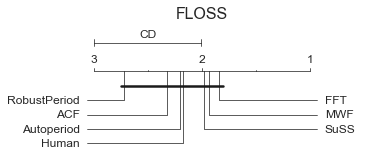

In [9]:
cd = Orange.evaluation.scoring.compute_CD(means, df_scores.shape[0])
Orange.evaluation.scoring.graph_ranks(means, df_scores.columns[1:], cd=cd, highv=3, width=5, reverse=True, textspace=1, ) # filename="../tmp/comparative-analysis.pdf"
plt.title("FLOSS", fontsize=16)
plt.savefig(f"../tmp/cd_floss.pdf", bbox_inches="tight")
plt.show()

Let's compute wins/losses against ClaSP.

In [11]:
selection = "Human"

for rival in df_scores.columns[1:]:
    if rival == selection: continue
    
    df_pair = df_scores[[selection, rival]]
    pair_ranks = df_pair.rank(1, method = 'min', ascending=False)
    
    wins = pair_ranks[(pair_ranks[selection] == 1) & (pair_ranks[rival] == 2)].shape[0]
    losses = pair_ranks[(pair_ranks[selection] == 2) & (pair_ranks[rival] == 1)].shape[0]
    ties = pair_ranks[(pair_ranks[selection] == 1) & (pair_ranks[rival] == 1)].shape[0]
    
    assert wins + losses + ties == pair_ranks.shape[0]
    
    print(f"{selection} vs {rival}: (wins/ties/losses): {wins}/{ties}/{losses}")

Human vs FFT: (wins/ties/losses): 13/58/12
Human vs ACF: (wins/ties/losses): 26/34/23
Human vs SuSS: (wins/ties/losses): 16/49/18
Human vs MWF: (wins/ties/losses): 19/46/18
Human vs Autoperiod: (wins/ties/losses): 22/48/13
Human vs RobustPeriod: (wins/ties/losses): 24/45/14


In [ ]:
fontsize = 18
_, ax = plt.subplots(figsize=(10,10))

df_scores.boxplot(ax=ax, rot=90)
ax.set_ylabel(eval_score, fontsize=fontsize)

ax.legend(prop={'size': fontsize})

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)
    
# plt.savefig(f"../tmp/comparative_analysis_boxplot.pdf", bbox_inches="tight") 